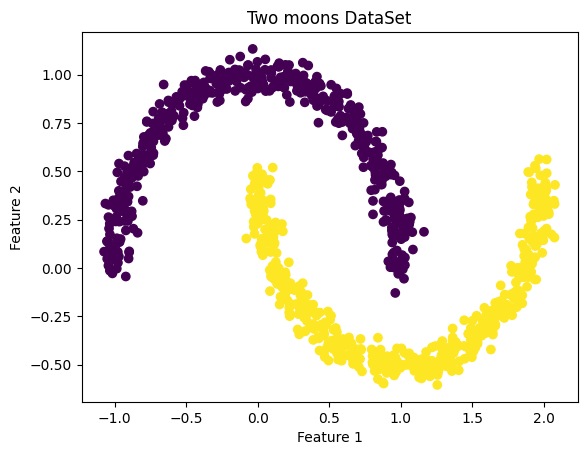

In [25]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

# Generate the data
dataset1_X, dataset1_y = make_moons(n_samples=1000, noise=0.05, random_state=0)


# Plot the data
plt.scatter(dataset1_X[:, 0], dataset1_X[:, 1], c=dataset1_y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Two moons DataSet')
plt.show()

In [26]:
def data_generator():
  n = 1000
  t = np.linspace(0, 2*np.pi, n)
  r = np.linspace(0.5, 1, n)
  x1 = r * np.cos(t) + np.random.randn(n) * 0.033
  y1 = r * np.sin(t) + np.random.randn(n) * 0.033
  x2 = -r * np.cos(t) + np.random.randn(n) * 0.033
  y2 = -r * np.sin(t) + np.random.randn(n) * 0.033
  X = np.vstack((np.hstack((x1, x2)), np.hstack((y1, y2)))).T
  y = np.hstack((np.zeros(n), np.ones(n)))

  return X,y

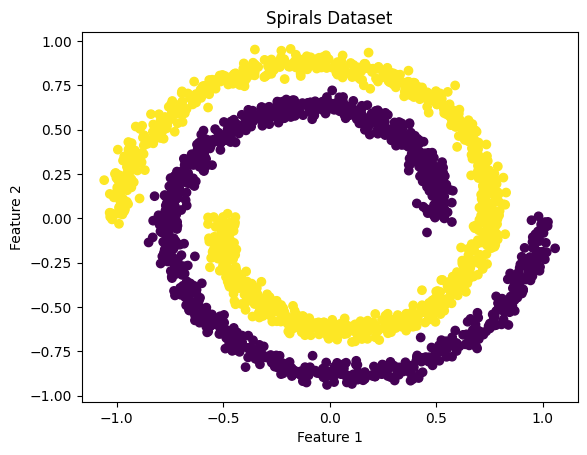

In [27]:
import numpy as np
import matplotlib.pyplot as plt


Dataset2_X, Dataset2_y = data_generator()


plt.scatter(Dataset2_X[:, 0], Dataset2_X[:, 1], c=Dataset2_y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Spirals Dataset')
plt.show()


**بخش الف**





In [28]:
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import cdist

# Randomly select 500 data points
np.random.seed(42)  # Set the random seed for reproducibility
dataset1_indices = np.random.choice(len(dataset1_X), size=500, replace=False)
dataset1_selected = dataset1_X[dataset1_indices]

# Perform hierarchical clustering
dataset1_linkage = linkage(dataset1_selected, method='complete')

# Select representation points for clusters
num_rep_points = 5  # Number of representation points per cluster
dataset1_rep_points = []
for cluster_id in np.unique(dataset1_linkage[:, 3]):
    cluster_points = dataset1_selected[np.where(dataset1_linkage[:, 3] == cluster_id)]
    if len(cluster_points) <= num_rep_points:
        dataset1_rep_points.append(cluster_points)
    else:
        distances = cdist(cluster_points, cluster_points, metric='euclidean')
        total_distance = distances.sum(axis=1)
        rep_indices = np.argsort(total_distance)[:num_rep_points]
        rep_points = cluster_points[rep_indices]
        dataset1_rep_points.append(rep_points)

dataset1_rep_points = np.vstack(dataset1_rep_points)



# Randomly select 500 data points
np.random.seed(42)  # Set the random seed for reproducibility
Dataset2_indices = np.random.choice(len(Dataset2_X), size=500, replace=False)
Dataset2_selected = Dataset2_X[Dataset2_indices]

# Perform hierarchical clustering
Dataset2_linkage = linkage(Dataset2_selected, method='complete')

# Select representation points for clusters
num_rep_points = 5  # Number of representation points per cluster
Dataset2_rep_points = []
for cluster_id in np.unique(Dataset2_linkage[:, 3]):
    cluster_points = Dataset2_selected[np.where(Dataset2_linkage[:, 3] == cluster_id)]
    if len(cluster_points) <= num_rep_points:
        Dataset2_rep_points.extend(cluster_points)
    else:
        distances = cdist(cluster_points, cluster_points, metric='euclidean')
        total_distance = distances.sum(axis=1)
        rep_indices = np.argsort(total_distance)[:num_rep_points]
        rep_points = cluster_points[rep_indices]
        Dataset2_rep_points.extend(rep_points)

Dataset2_rep_points = np.array(Dataset2_rep_points)





 **بخش ب رسم دیتاست اول**

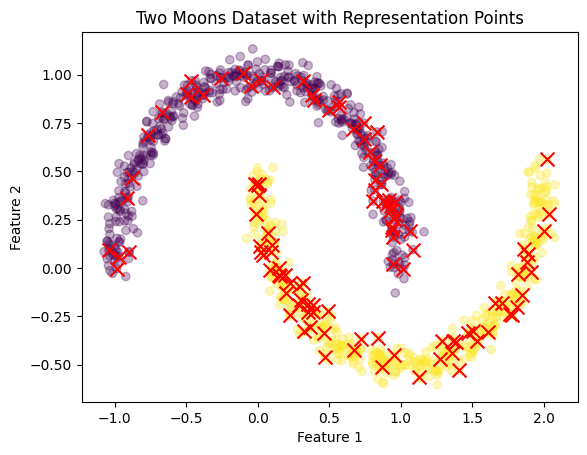

In [29]:
# Plot the data and representation points
plt.scatter(dataset1_X[:, 0], dataset1_X[:, 1], c=dataset1_y, alpha=0.3)
plt.scatter(dataset1_rep_points[:, 0], dataset1_rep_points[:, 1], marker='x', color='red', s=100)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Two Moons Dataset with Representation Points')
plt.show()

 **بخش ب رسم دیتاست دوم**

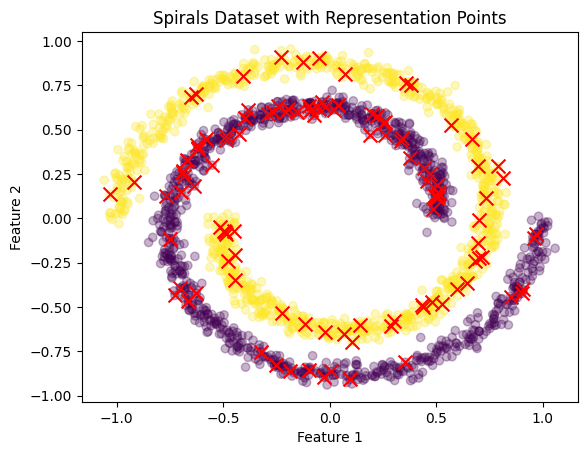

In [30]:
# Plot the data and representation points
plt.scatter(Dataset2_X[:, 0], Dataset2_X[:, 1], c=Dataset2_y, alpha=0.3)
plt.scatter(Dataset2_rep_points[:, 0], Dataset2_rep_points[:, 1], marker='x', color='red', s=100)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Spirals Dataset with Representation Points')
plt.show()


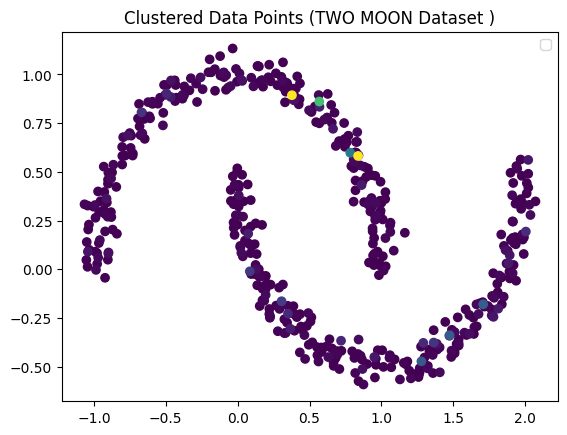

In [31]:
# Assign each point to its nearest representative point's cluster
nearest_clusters = dataset1_linkage[:, 3].astype(int)

# Create a dictionary to store cluster points
cluster_points = {}

# Initialize dictionary with empty lists for each cluster
for cluster_id in np.unique(nearest_clusters):
    cluster_points[cluster_id] = []

# Assign points to their respective clusters
for i, point in enumerate(dataset1_selected):
    cluster_id = nearest_clusters[i - 1 ]
    cluster_points[cluster_id].append(point)

# Convert dictionary values to arrays
for cluster_id in cluster_points:
    cluster_points[cluster_id] = np.array(cluster_points[cluster_id])


cluster_labels = np.array([cluster_id for cluster_id in cluster_points for _ in range(len(cluster_points[cluster_id]))])
                          
# Plot the data points for clusters
plt.scatter(dataset1_selected[:, 0], dataset1_selected[:, 1], c=cluster_labels)


# Set plot labels and title

plt.title('Clustered Data Points (TWO MOON Dataset )')
plt.legend()

# Display the plot
plt.show()

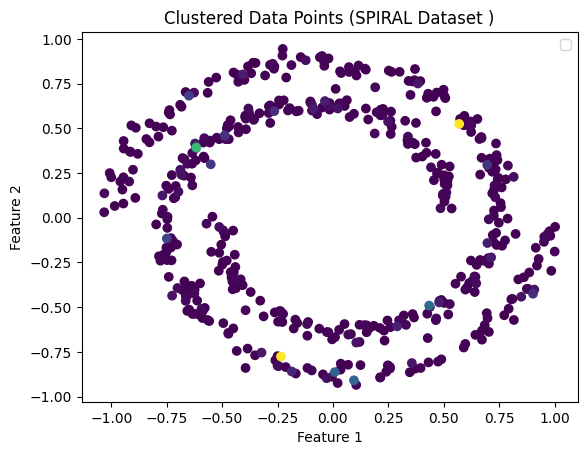

In [32]:
# Assign each point to its nearest representative point's cluster
nearest_clusters = Dataset2_linkage[:, 3].astype(int)

# Create a dictionary to store cluster points
cluster_points = {}

# Initialize dictionary with empty lists for each cluster
for cluster_id in np.unique(nearest_clusters):
    cluster_points[cluster_id] = []

# Assign points to their respective clusters
for i, point in enumerate(Dataset2_selected):
    cluster_id = nearest_clusters[i -1]
    cluster_points[cluster_id].append(point)

# Convert dictionary values to arrays
for cluster_id in cluster_points:
    cluster_points[cluster_id] = np.array(cluster_points[cluster_id])

# Assign points to their respective clusters
cluster_labels = np.array([cluster_id for cluster_id in cluster_points for _ in range(len(cluster_points[cluster_id]))])

# Plot the data points with different colors based on their assigned clusters
plt.scatter(Dataset2_selected[:, 0], Dataset2_selected[:, 1], c=cluster_labels)

# Set plot labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clustered Data Points (SPIRAL Dataset )')
plt.legend()
# Display the plot
plt.show()
